# Quick examples

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://githubtocolab.com/PyJobShop/PyJobShop/blob/main/examples/hybrid_flow_shop.ipynb)

> If you're using this notebook in Google Colab, be sure to install PyJobShop first by executing ```pip install pyjobshop``` in a cell.
 
This notebook contains a number of quick examples to demonstrate PyJobShop features not contained in the other notebooks.

In [1]:
from pyjobshop import Model
from pyjobshop.plot import plot_machine_gantt

## Sequence-dependent setup times
Machines may require different configuration settings for processing different types of tasks. This results in _sequence-dependent setup times_, which is the time that is required to reconfigure machines between processing two tasks. Let's showcase a small example here.

In [2]:
model = Model()
tasks = [model.add_task() for _ in range(6)]
machines = [model.add_machine() for _ in range(2)]

for task in tasks:
    # The first machine is faster than the second machine.
    model.add_mode(task, machines[0], duration=1)
    model.add_mode(task, machines[1], duration=3)

for task1 in tasks:
    for task2 in tasks:
        model.add_setup_time(machines[0], task1, task2, duration=1)
        model.add_setup_time(machines[1], task1, task2, duration=2)

In [3]:
result = model.solve(display=False)
print(result)

Solution results
objective: 8.00
   status: Optimal
  runtime: 0.08 seconds


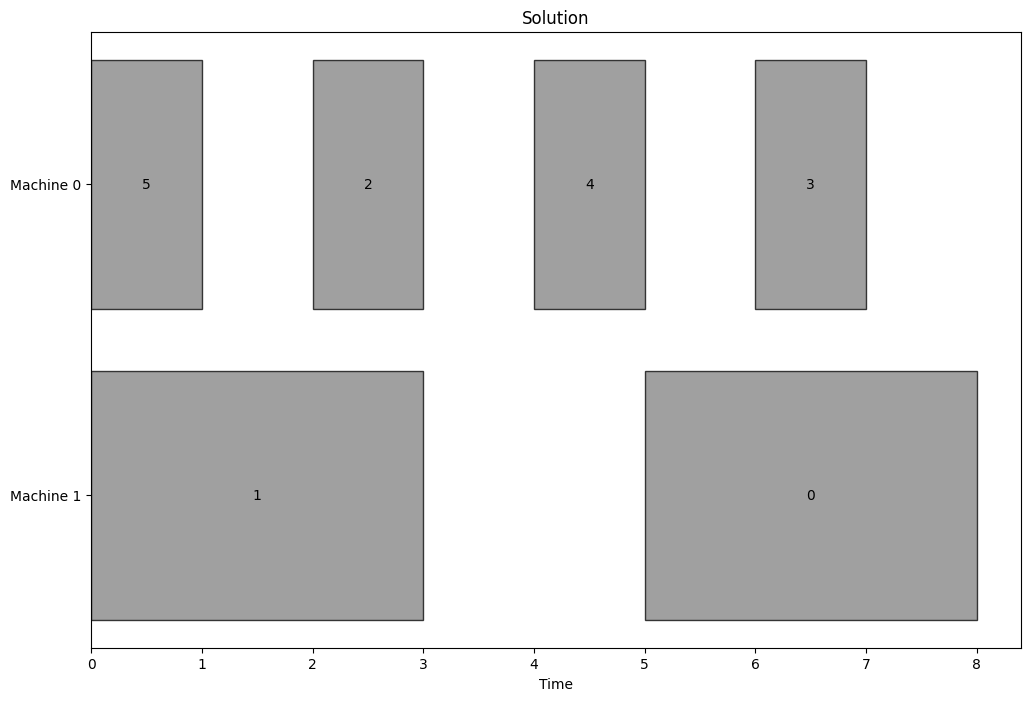

In [4]:
data = model.data()
plot_machine_gantt(result.best, data, plot_labels=True)

Some notes:

- Instances with sequence-dependent setup times are generally hard to solve, and it's even harder to solve to optimality. Consider using a time limit when solving such instances.
- Unlike CP Optimizer, OR-Tools does not have specialized constraints to deal with sequence-dependent setup times. This makes the implementation of OR-Tools substantially slower.

## Finding feasible solutions

In some situations, it may be only needed to find a feasible solution. You can achieve this by passing an additional parameter to the `solve` function, depending on the solver used:

- OR-Tools: `stop_after_first_solution=True`.
- CP Optimizer: `SolutionLimit=1`.

Below we demonstrate it with OR-Tools (used by default).

In [5]:
model = Model()
tasks = [model.add_task(name=idx) for idx in range(6)]
machines = [model.add_machine(name=idx) for idx in range(2)]

for task in tasks:
    model.add_mode(task, machines[0], duration=1)
    model.add_mode(task, machines[1], duration=3)

In [6]:
result = model.solve(display=False, stop_after_first_solution=True)
print(result)

Solution results
objective: 18.00
   status: Feasible
  runtime: 0.01 seconds


Let's double-check that the optimal solution is better:

In [7]:
result = model.solve(display=False)
print(result)

Solution results
objective: 5.00
   status: Optimal
  runtime: 0.01 seconds
